In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from  pandas_datareader import DataReader

from datetime import datetime

from __future__ import division

In [3]:
# List of tech stock
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [5]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock]=DataReader(stock, 'yahoo', start, end)

In [6]:
# Exemple Apple
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,285.681700,278.901502,281.926364,282.662252,3.564930e+07,281.612798
std,52.335704,51.109413,51.673402,51.932575,1.703746e+07,52.476595
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,245.699997,238.399994,242.100006,243.179993,2.441360e+07,241.304398
50%,281.769989,276.859985,277.950012,279.440002,3.119080e+07,278.025757
75%,319.989990,315.630005,317.750000,318.250000,4.135720e+07,317.236298
max,425.660004,403.299988,411.540009,425.040009,1.067212e+08,425.040009


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-08-01 to 2020-07-31
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


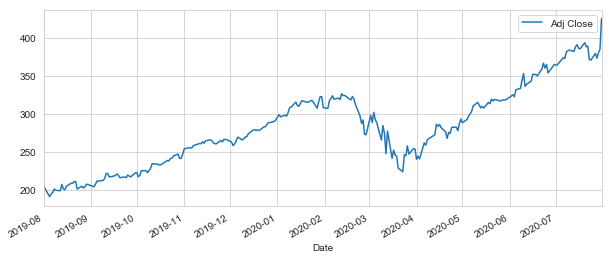

In [8]:
# Historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

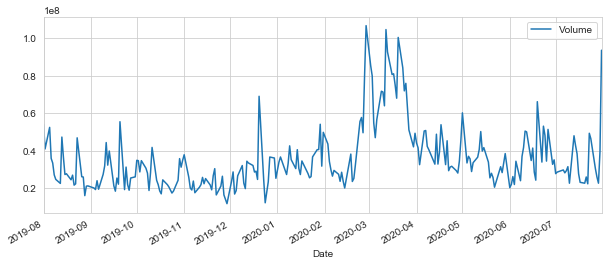

In [9]:
# Total volume of stock being traded over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

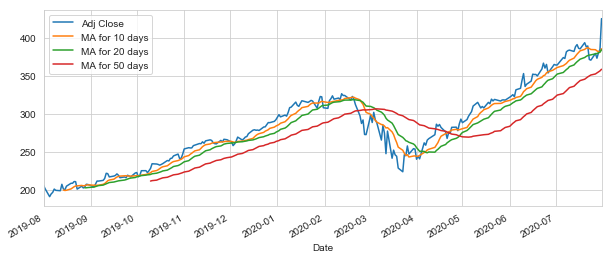

In [10]:
# Caculation of the moving average for the stock
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))